In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from BSDE_Solver import BSDE_Solver
from Runge_Kutta_Solver import Runge_Kutta_Solver
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Remove warnings

In [26]:
n = 10
# Set parameters
parameters = {
    "Q": tf.constant([[0.1, 0.2], [0.2, 0.1]]),
    'R': tf.constant([[0.1, 0.2], [0.2, 0.1]]),
    'S': tf.constant([[0.0, 0.0], [0.0, 0.0]]),
    'A': tf.constant([[0.0, 0.4], [0.4, 0.0]]),
    'B': tf.constant([[0.3, 0.0], [0.0, 0.3]]),
    'C': tf.constant([[0.3, 0.2], [0.2, 0.3]]),
    'D': tf.constant([[0.2, 1.0], [1.0, 0.2]]),
    'G': -tf.constant([[0.3, 0.1], [0.1, 0.3]]),
    'L': -tf.constant([[0.3], [0.1]]),
    'N': n,
    'batch_size': 1024,
    'iteration_steps': 2000,
    'x_0': tf.Variable([[1.5], [1.3]]),
    'lr_gamma': 1e-1,
    'lr_pi': 1e-2
}

parameters_RK = {
    "Q": np.array([[0.1, 0.2], [0.2, 0.1]]),
    'R': np.array([[0.1, 0.2], [0.2, 0.1]]),
    'S': np.array([[0.0, 0.0], [0.0, 0.0]]),
    'A': np.array([[0.0, 0.4], [0.4, 0.0]]),
    'B': np.array([[0.3, 0.0], [0.0, 0.3]]),
    'C': np.array([[0.3, 0.2], [0.2, 0.3]]),
    'D': np.array([[0.2, 0.1], [0.1, 0.2]]),
    'G': np.array([[0.3, 0.1], [0.1, 0.3]]),
    'L': np.array([[0.3], [0.1]]),
    'N': n,
}

In [27]:
# Define solver with the parameters
bsde_solver = BSDE_Solver(parameters)
ode_solver = Runge_Kutta_Solver(parameters_RK)

In [30]:
bsde_solver.train(display_steps=True)

Training in progress
--------------------------------------------------
Iteration step 200, time: 6.1779 minutes
Iteration step 400, time: 11.7207 minutes
Iteration step 600, time: 17.1467 minutes
Iteration step 800, time: 22.4387 minutes
Iteration step 1000, time: 27.7680 minutes
Iteration step 1200, time: 33.0623 minutes
Iteration step 1400, time: 38.3605 minutes
Iteration step 1600, time: 43.6415 minutes
Iteration step 1800, time: 48.9352 minutes
Iteration step 2000, time: 54.2263 minutes
Training finished


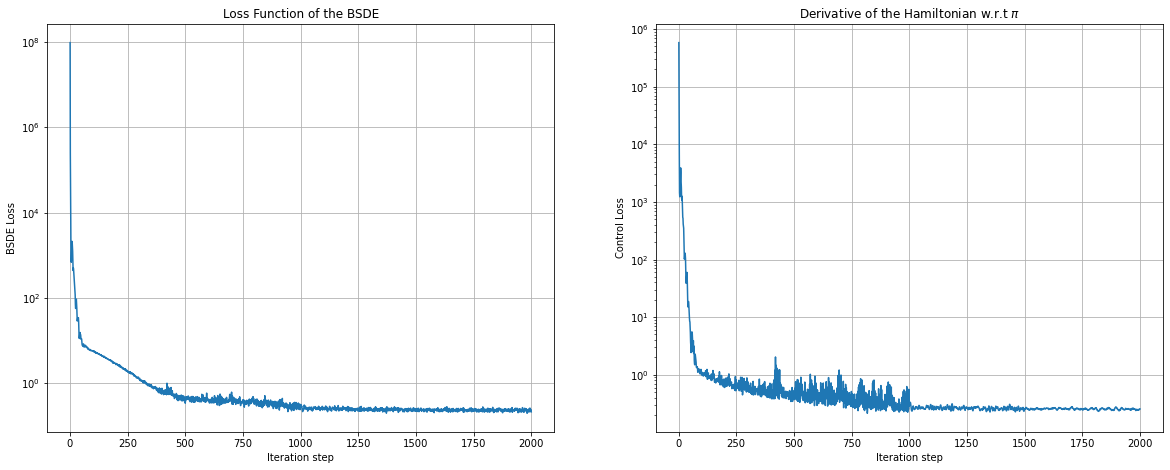

In [31]:
bsde_solver.plot("losses")

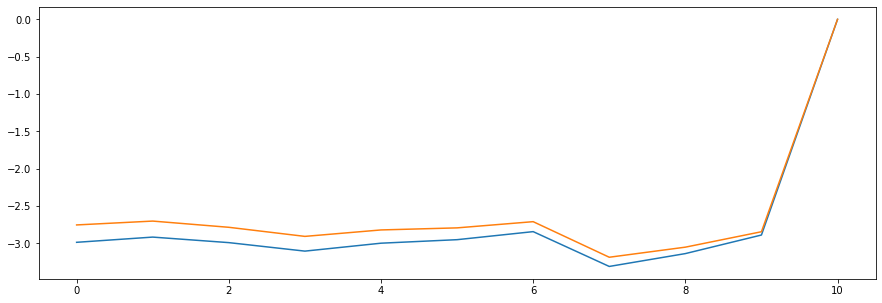

In [32]:
X, V_bsde, Z = bsde_solver.simulate()

V_primal_RK = ode_solver.compute_V_primal(X)
V_primal_from_dual = ode_solver.compute_V_primal_from_dual(X)

plt.figure(figsize=(15, 5))
plt.plot(V_primal_RK)
plt.plot(V_primal_from_dual)
plt.show()

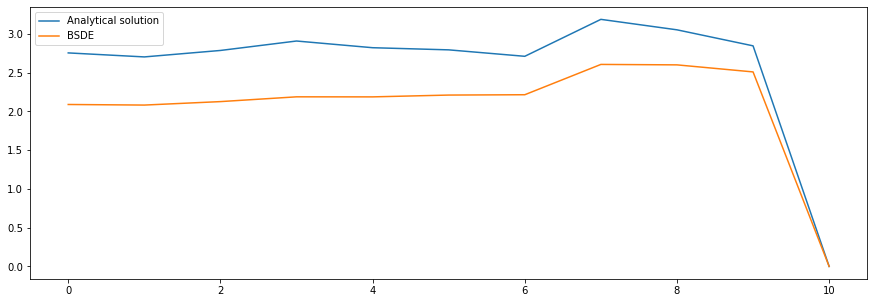

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(-V_primal_from_dual, label="Analytical solution")

plt.plot(V_bsde, label="BSDE")
plt.legend()
plt.show()